## Network Analysis using NetworkX

## What are Networks (Graphs)?

A graph G is represented by a set of nodes and a set of edges. An edge between two nodes in a graph signifies a relationship between those two nodes. Edges can be directed and undirected.
![title](img/network.png)

# Examples?

![title](img/example.png)

NetworkX uses dictionaries underneath to store node and edge data.
It's dict-o-dict-o-dict-o-dict to be precise.
```
G['node1']
G['node1']['node2']
G['node1']['node2']['some_id']['some_attrb']
```

In [330]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [331]:
# Create an empty graph object with no nodes and edges.
G = nx.Graph() # DiGraph, MultiGraph, MultiDiGraph

In [332]:
# Add nodes to our graph object
# In NetworkX, nodes can be any hashable object e.g. a text string, an image,
# an XML object, another Graph, a customized node object, etc.

G.add_node('1')
G.add_node(1)
G.add_node('second')

# G.add_node({'dictionary': 'will throw error'})
# G.add_node([1, 2])

In [333]:
list_of_nodes = [1, 2, 3, 'node4']
G.add_nodes_from(list_of_nodes)

In [334]:
# NetworkX has a lot of graph generators path_graph is one of them.
H = nx.path_graph(7)
G.add_nodes_from(H)

In [335]:
# Access nodes in a Graph object
G.nodes()

[0, 1, 2, 3, 4, 5, 6, '1', 'second', 'node4']

Difference between `G.add_node(H)` and `G.add_nodes_from(H)`?

In [148]:
# Now let's talk about edges.
# Edge between two nodes means that they share some property/relationship

G.add_edge(0, 'second')
G.add_edge(2, 3)
G.add_edge('second', 'node4')

list_of_edges = [(2, 3), (4, 5), ('node4', 0)]
G.add_edges_from(list_of_edges)

# Check out edges
G.edges()

[(0, 'second'), (0, 'node4'), (2, 3), (4, 5), ('second', 'node4')]

In [149]:
# Number of nodes and edges.
print G.number_of_nodes(), len(G), len(G.nodes())
print G.number_of_edges(), len(G.edges())

# Utility functions.
print G.nodes()
G.remove_node(0)
print G.nodes()

print G.edges()
G.remove_edge(4, 5)
print G.edges()

G.clear()
print G.nodes(), G.edges()

10 10 10
5 5
[0, 1, 2, 3, 4, 5, 6, '1', 'second', 'node4']
[1, 2, 3, 4, 5, 6, '1', 'second', 'node4']
[(2, 3), (4, 5), ('second', 'node4')]
[(2, 3), ('second', 'node4')]
[] []


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (1, 9), (1, 6), (1, 7), (2, 8), (2, 9), (3, 9), (3, 4), (3, 6), (4, 7)]


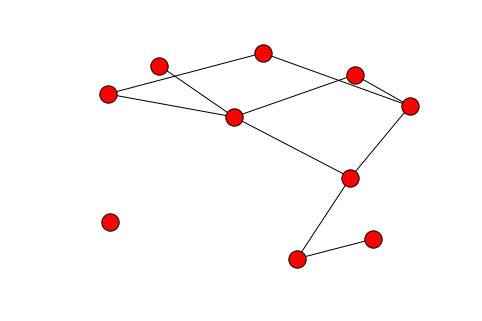

In [150]:
# One more graph generator. This will create
# a Erdos-Reyni Graph
G = nx.fast_gnp_random_graph(10, 0.2, seed=1)

# Let's checkout nodes and edges
print G.nodes()
print G.edges()
nx.draw(G)

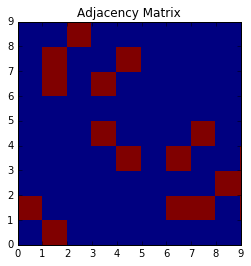

In [151]:
matrix = nx.to_numpy_matrix(G)

plt.pcolor(np.array(matrix))
plt.axes().set_aspect('equal') # set aspect ratio equal to get a square visualization
plt.xlim(min(G.nodes()), max(G.nodes())) # set x and y limits to the number of nodes present.
plt.ylim(min(G.nodes()), max(G.nodes()))
plt.title('Adjacency Matrix')
plt.show()

# Credits: Eric Ma

In [152]:
# Accessing the graph dictionary
print 'nodes: ', (G.nodes())
print 'edges: ', G.edges()

print G[0]
print G[1]
print G[1][9]

nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges:  [(0, 1), (1, 9), (1, 6), (1, 7), (2, 8), (2, 9), (3, 9), (3, 4), (3, 6), (4, 7)]
{1: {}}
{0: {}, 9: {}, 6: {}, 7: {}}
{}


In [153]:
# Adding attributes to graphs, nodes, and edges.
G.graph['attr'] = 'EuroSciPy'

print G.graph

G.add_node(1, time='11:00AM')
print G.nodes()
print G.nodes(data=True)

{'name': 'fast_gnp_random_graph(10,0.2)', 'attr': 'EuroSciPy'}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, {}), (1, {'time': '11:00AM'}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {}), (9, {})]


In [154]:
G.add_edge(1, 2, weight=4.7)

G.add_edges_from([(3, 4), (4, 5)], color='red')

G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])

G[1][2]['weight'] = 4.7

In [155]:
print G[1]
print G[1][2]
print G[1][2]['color']

{0: {}, 9: {}, 2: {'color': 'blue', 'weight': 4.7}, 6: {}, 7: {}}
{'color': 'blue', 'weight': 4.7}
blue


### Exercise - 1

In [156]:
G = nx.Graph()
list_of_cities = [('Paris', 'Munich', 841), ('Munich', 'Berlin', 584), ('Berlin', 'London', 1101), ('Paris', 'Barcelona', 1038)]
G.add_weighted_edges_from(list_of_cities)

print G.nodes()
print G.edges(data=True)
# Iterate through the edges and find the highest weight.

['Paris', 'Berlin', 'London', 'Barcelona', 'Munich']
[('Paris', 'Barcelona', {'weight': 1038}), ('Paris', 'Munich', {'weight': 841}), ('Berlin', 'London', {'weight': 1101}), ('Berlin', 'Munich', {'weight': 584})]


In [157]:
result = max([w for u, v, w in G.edges(data=True)])
print result

# max(G.edges(data=True), key=lambda x:x[2])

{'weight': 1101}


Let's work on a read world network.

Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network is from the e-print arXiv and covers scientific collaborations between authors papers submitted to General Relativity and Quantum Cosmology category. If an author i co-authored a paper with author j, the graph contains a undirected edge from i to j. If the paper is co-authored by k authors this generates a completely connected (sub)graph on k nodes.

source: http://snap.stanford.edu/data/index.html#canets

In [295]:
import csv
G = nx.Graph()
with open('CA-GrQc.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        G.add_edge(row[0], row[1])

In [296]:
print G.number_of_edges()
print G.number_of_nodes()

14496
5242


Let's start some analysis of this network.

In [233]:
# Neighbors/ degree of node is one way of calculating the importance
# of the node.

len(G.neighbors('22504'))

33

### Exercise - 2

Create a list of (node, degree of node) tuples and find the node with maximum degree.

In [234]:
result = [(node, len(G.neighbors(node))) for node in G.nodes_iter()]

In [235]:
max(result, key=lambda node:node[1])

('21012', 81)

In [236]:
G.degree()['21012']

81

In [237]:
# G = nx.fast_gnp_random_graph(1000, 0.9)
D = {}
for node, value in nx.degree_centrality(G).items():
    if value in D:
        D[value] += 1
    else:
        D[value] = 1

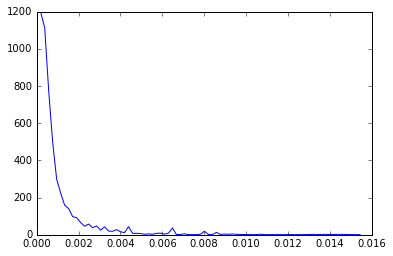

In [238]:
d = sorted(D.items())
x, y = zip(*d)
plt.plot(x, y)
plt.show()

In [239]:
# Various other measures of centrality like ``nx.closeness_centrality`` and ``nx.betweenness_centrality``

In [240]:
# Lets talk about connected components of a graph.
print [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[4158, 14, 12, 10, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [241]:
graphs = [c for c in sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)]

In [242]:
len(graphs[1])

14

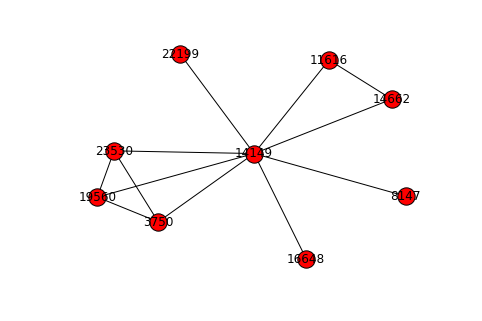

In [336]:
nx.draw(graphs[5], with_labels=True)

In [337]:
# One of the most important features of network analyis is graph
# traversal.
print nx.shortest_path(graphs[0], '22504', '23991')
print len(nx.shortest_path(graphs[0], '22504', '23991'))
print nx.shortest_path_length(graphs[0], '22504', '23991')

['22504', '6512', '18757', '5172', '3677', '23991']
6
5


In [245]:
# nx.shortest_path(G, '22504', '17453')

### Excersise -3 
##### Six degrees of separation, Erdos Number, Bacon Number!!

Find the '22504' number of the graph G, if there is no connection between nodes then give it the number `-1`.
Also plot a histogram of the '22504' number.

HINT: `nx.shortest_path_length`

In [246]:
# G = nx.fast_gnp_random_graph(100, 0.3, seed=1)


In [247]:
d = {}
for node in G.nodes():
    try:
        d[node] = nx.shortest_path_length(G, '22504', node)
    except:
        d[node] = -1

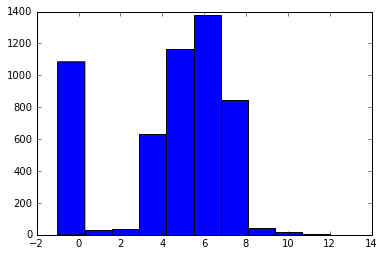

In [248]:
plt.hist(d.values())
plt.show()

#### Structures, Cliques in a Network

A subset of nodes which induce a complete subgraph is a clique.

In [254]:
G = nx.complete_graph(5)
G.add_edge(4, 5)

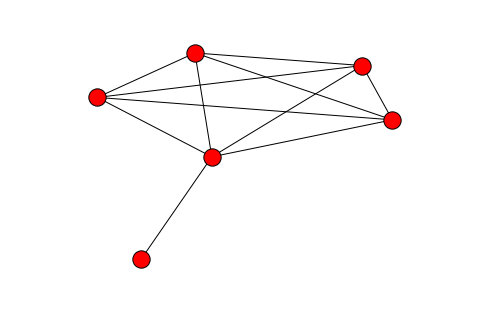

In [255]:
nx.draw(G)

### Triads in a Network

In [259]:
G = nx.Graph()
list_of_edges = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2), (3, 4), (5, 6)]
G.add_edges_from(list_of_edges)

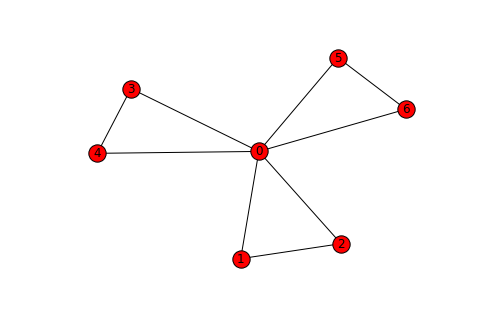

In [263]:
nx.draw(G, with_labels=True)

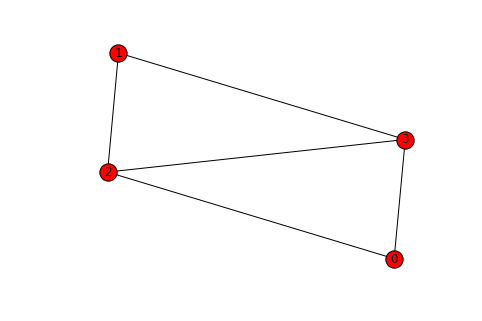

In [273]:
# Facebook friend search, amazon product recommendation.
G = nx.complete_graph(4)
G.remove_edge(0, 1)
nx.draw(G, with_labels=True)

#### Link Prediction usign Jaccard coefficient

In [338]:
G = nx.fast_gnp_random_graph(300, 0.2)
# list(nx.jaccard_coefficient(G))

### Excersise - 

Create a recommender for authors by listing the top 5 authors by jaccard coefficient.

In [328]:
d ={}
for u, v, p in nx.jaccard_coefficient(G):
    if u in d:
        d[u].append((v, p))
    elif u not in d:
        d[u] = [(v, p)]
    if v in d:
        d[v].append((u, p))
    elif v not in d:
        d[v] = [(u, p)]

In [329]:
for u, w in d.items():
    print u, sorted(w, key=lambda x: x[1], reverse=True)[0:5]

0 [(63, 0.20689655172413793), (192, 0.2), (278, 0.2), (234, 0.19801980198019803), (116, 0.1978021978021978)]
1 [(86, 0.22641509433962265), (148, 0.19090909090909092), (248, 0.19047619047619047), (196, 0.19), (187, 0.18867924528301888)]
2 [(258, 0.19327731092436976), (239, 0.19090909090909092), (163, 0.1891891891891892), (77, 0.18867924528301888), (24, 0.18803418803418803)]
3 [(37, 0.1782178217821782), (284, 0.1782178217821782), (183, 0.17708333333333334), (275, 0.17346938775510204), (266, 0.17)]
4 [(8, 0.19230769230769232), (30, 0.19), (61, 0.1891891891891892), (295, 0.18518518518518517), (231, 0.18446601941747573)]
5 [(116, 0.19607843137254902), (191, 0.19444444444444445), (85, 0.18518518518518517), (291, 0.18095238095238095), (67, 0.1792452830188679)]
6 [(248, 0.20388349514563106), (74, 0.20212765957446807), (55, 0.1941747572815534), (66, 0.19387755102040816), (99, 0.18421052631578946)]
7 [(174, 0.22), (8, 0.1941747572815534), (80, 0.1926605504587156), (190, 0.1792452830188679), (92,